In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json
import numpy as np

In [3]:
!curl https://pythonprogramming.net/static/downloads/machine-learning-data/training_data-100k.json >> training_sent_100k.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.9M  100 30.9M    0     0  12.3M      0  0:00:02  0:00:02 --:--:-- 12.3M


In [0]:
with open('/content/drive/My Drive/training_data_bikash1.json', 'r') as f:
    data1 = json.load(f)
    xb = np.array(data1['xs'])
    yb = np.array(data1['ys'])

In [24]:
print(len(xb))

12000


In [0]:
with open('/content/training_sent_100k.json', 'r') as f:
    data = json.load(f)
    xs = np.array(data['xs'])
    ys = np.array(data['ys'])

In [22]:
print(len(ys))

300000


In [0]:
x_train = xs[:-10000]
y_train = ys[:-10000]
x_test = xs[-10000:]
y_test = ys[-10000:]

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [28]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=6))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
adam = keras.optimizers.Adam(lr=0.01)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          shuffle=True,
          batch_size=128)

Train on 290000 samples, validate on 10000 samples
Epoch 1/10
290000/290000 [==============================] - 8s 29us/step - loss: 0.8141 - acc: 0.5980 - val_loss: 0.9035 - val_acc: 0.3705
Epoch 2/10
290000/290000 [==============================] - 8s 28us/step - loss: 0.7910 - acc: 0.5867 - val_loss: 0.9743 - val_acc: 0.4237
Epoch 3/10
290000/290000 [==============================] - 8s 27us/step - loss: 0.7958 - acc: 0.5814 - val_loss: 0.9837 - val_acc: 0.3553
Epoch 4/10
290000/290000 [==============================] - 8s 27us/step - loss: 0.8413 - acc: 0.5279 - val_loss: 0.7194 - val_acc: 0.9982
Epoch 5/10
290000/290000 [==============================] - 8s 28us/step - loss: 0.8643 - acc: 0.5260 - val_loss: 0.8342 - val_acc: 0.6562
Epoch 6/10
290000/290000 [==============================] - 8s 28us/step - loss: 0.8792 - acc: 0.5199 - val_loss: 1.0399 - val_acc: 0.9519
Epoch 7/10
290000/290000 [==============================] - 8s 27us/step - loss: 0.8796 - acc: 0.5186 - val_loss: 0

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,803
Trainable params: 4,803
Non-trainable params: 0
_________________________________________________________________


In [0]:
import matplotlib.pyplot as plt

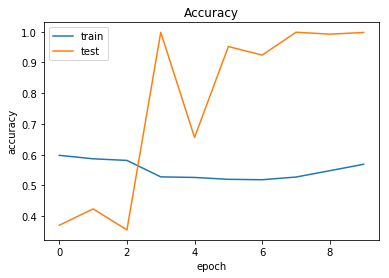

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [46]:
score = model.evaluate(x_test, y_test, batch_size=128)
print(score)
model.save("Keras-64x2-10epoch")

10000/10000 [==============================] - 0s 10us/step
[0.8044797980308532, 0.9977]
